# Supervised classfication problem(MNIST)

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn import datasets
from sklearn import manifold

%matplotlib inline

warnings.filterwarnings('ignore')

In [2]:
data = datasets.fetch_openml(
                            'mnist_784',
                            version=1,
                            return_X_y = True)

pixel_values, targets = data
targets = targets.astype(int)

In [11]:
type(data)

tuple

In [17]:
pixel_values.shape

(70000, 784)

In [21]:
targets

array([5, 0, 4, ..., 4, 5, 6])

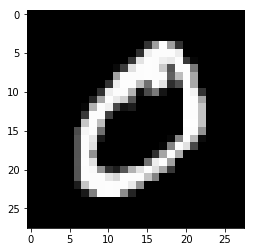

In [23]:
single_image = pixel_values[1, :].reshape(28,28)
plt.imshow(single_image, cmap='gray')

#t-sne

In [25]:
tsne = manifold.TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(pixel_values[:3000,:])

In [27]:
tsne_df = pd.DataFrame(np.column_stack((transformed_data, targets[:3000])),
                        columns = ["x","y","targets"]
                      )

tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)

In [29]:
tsne_df.head()

,x,y,targets
0,-5.281551,-28.952768,5
1,-26.105896,-68.069321,0
2,-42.503582,35.580391,4
3,38.893967,26.663395,1
4,-14.770573,35.433247,9


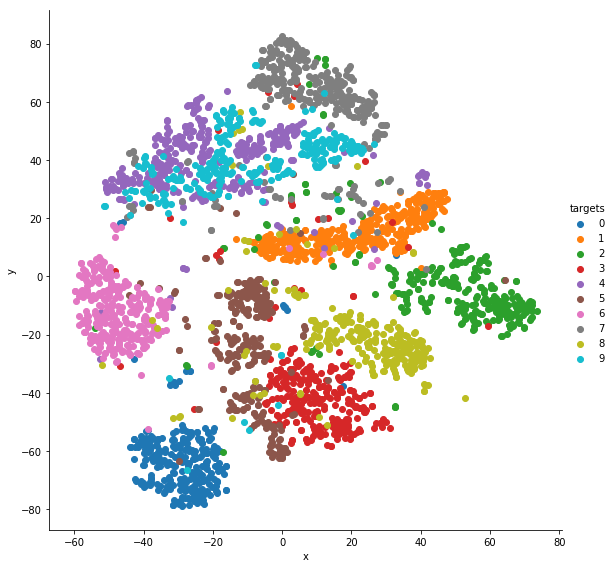

In [30]:
grid = sns.FacetGrid(tsne_df, hue="targets", size= 8)
grid.map(plt.scatter,"x","y").add_legend()